# Power Laws: Detecting Anomalies in Usage
Energy consumption of buildings has steadily increased. There is an increasing realization that many buildings do not perform as intended by their designers. Typical buildings consume 20% more energy than necessary due to faulty construction, malfunctioning equipment, incorrectly configured control systems and inappropriate operating procedures.

The building systems may fail to meet the performance expectations due to various faults. Poorly maintained, degraded, and improperly controlled equipment wastes an estimated 15% to 30% of energy used in commercial buildings.

Therefore, it is of great potential to develop automatic, quick-responding, accurate and reliable fault detection and to provide diagnosis schemes to ensure the optimal operations of systems to save energy.

Schneider Electric already has relevant offers, but would like to determine if alternative techniques can add new detections / functionalities, bring gain in precision, or operate with less data.

https://search.library.northwestern.edu/primo-explore/fulldisplay?docid=01NWU_HATHI_TRUSTMIU01-100664356&context=L&vid=NULVNEW&search_scope=NWU&tab=default_tab&lang=en_US

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import power_utils

%matplotlib inline

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = power_utils.import_data()

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
train.shape

(43668606, 12)

In [4]:
train.head()

,meter_id,timestamp,values,date,site_id,meter_description,units,surface,activity,holiday,temperature,distance
0,2,2015-06-11 00:00:00,2035.0,2015-06-11,334_61,main meter,Wh,2000.0,office,0.0,20.033333,16.317674
1,2,2015-06-11 00:15:00,2074.0,2015-06-11,334_61,main meter,Wh,2000.0,office,0.0,NaN,NaN
2,2,2015-06-11 00:30:00,2062.0,2015-06-11,334_61,main meter,Wh,2000.0,office,0.0,NaN,NaN
3,2,2015-06-11 00:45:00,2025.0,2015-06-11,334_61,main meter,Wh,2000.0,office,0.0,NaN,NaN
4,2,2015-06-11 01:00:00,2034.0,2015-06-11,334_61,main meter,Wh,2000.0,office,0.0,NaN,NaN


In [5]:
train.dtypes

meter_id                     object
timestamp            datetime64[ns]
values                      float64
date                         object
site_id                      object
meter_description            object
units                        object
surface                     float64
activity                     object
holiday                     float64
temperature                 float64
distance                    float64
dtype: object

In [6]:
categorical_variables = ['meter_id', 'site_id', 'meter_description', 'units', 'activity', 'holiday']
numeric_variables = ['values', 'surface', 'temperature', 'distance']
time_variables = ['timestamp', 'date']

In [7]:
train.describe()

,values,surface,holiday,temperature,distance
count,2.720098e+07,1.398200e+06,4.366861e+07,1.246938e+06,1.246938e+06
mean,1.489619e+08,5.347161e+03,2.893502e-02,1.578664e+01,1.010447e+01
std,5.453536e+11,1.161193e+03,1.676239e-01,4.204572e+00,7.248390e-01
min,-4.838107e+06,2.000000e+03,0.000000e+00,-1.900000e+00,8.992769e+00
25%,2.434100e+04,5.750000e+03,0.000000e+00,1.300000e+01,1.012582e+01
50%,1.675234e+05,5.750000e+03,0.000000e+00,1.600000e+01,1.012582e+01
75%,5.476100e+05,5.750000e+03,0.000000e+00,1.900000e+01,1.012582e+01
max,2.011201e+15,5.750000e+03,1.000000e+00,4.130000e+01,1.973414e+01


In [8]:
train.groupby('site_id').count()

,meter_id,timestamp,values,date,meter_description,units,surface,activity,holiday,temperature,distance
site_id,,,,,,,,,,,
038,42270406,42270406,25804688,42270406,42270406,39978637,0,42270406,42270406,0,0
234_203,1248000,1248000,1246349,1248000,1248000,1248000,1248000,1248000,1248000,1234456,1234456
334_61,150200,150200,149948,150200,150200,150200,150200,150200,150200,12482,12482


Site ID '038' has no surface, temperature, distance measurements yet has the majority of observations by far. 

39% of the 'value' fields are missing for '038' while the other sites have < 1% missing 'value'

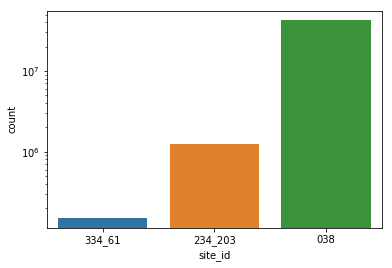

In [9]:
p = sns.countplot(x="site_id", data=train)
p.set(yscale="log");

In [10]:
train.groupby("meter_description").count()

,meter_id,timestamp,values,date,site_id,units,surface,activity,holiday,temperature,distance
meter_description,,,,,,,,,,,
Lighting,35856,35856,35822,35856,35856,35856,35856,35856,35856,35685,35685
RTE meter,509282,509282,486644,509282,509282,509282,0,509282,509282,0,0
RTE meter: cos phi,509282,509282,479018,509282,509282,0,0,509282,509282,0,0
RTE meter: demand,509282,509282,485742,509282,509282,0,0,509282,509282,0,0
RTE meter: reactive,509282,509282,485743,509282,509282,0,0,509282,509282,0,0
Test Bay,73152,73152,73144,73152,73152,73152,73152,73152,73152,72381,72381
cold group,509282,509282,493543,509282,509282,509282,0,509282,509282,0,0
compressed air,509282,509282,494541,509282,509282,509282,0,509282,509282,0,0
cuisine,509282,509282,487769,509282,509282,509282,0,509282,509282,0,0


The majority of missing 'values' occur on 'heating', 'outside temperature', 'temperature' and 'total workers' types of 'meter_description' with 88%, 86%, 86%, and 83% missing, respectively

'other' type of 'meter_descriptions' also have a high missing 'value' rate with 21% missing. Unfortunately 'other' meters represent more than half of the meters

We do not see any 'units' measurements on any "RTE meter: %" types or on "main meter: %"

'surface', 'temperature' and 'distance' measurements are only available on 'Lighting', 'Test Bay', 'elevators', 'generator', 'heating', 'lighting, 'main meter', 'other', 'virtual main', 'virtual meter' types with significant missing values for each of these measurements on 'heating', 'lighting', 'main meter', 'other', and 'virtual meter' types


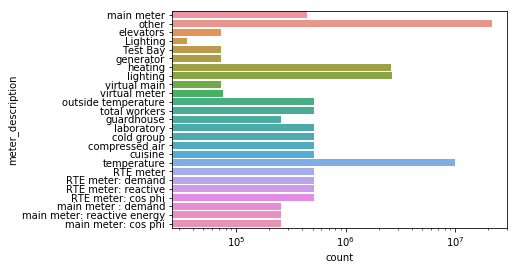

In [11]:
p = sns.countplot(y="meter_description", data=train)
p.set(xscale="log");

In [12]:
train.groupby("activity").count()

,meter_id,timestamp,values,date,site_id,meter_description,units,surface,holiday,temperature,distance
activity,,,,,,,,,,,
general,8148512,8148512,4142242,8148512,8148512,8148512,5856743,0,8148512,0,0
laboratory,8657794,8657794,4254601,8657794,8657794,8657794,8657794,0,8657794,0,0
office,23551967,23551967,15822180,23551967,23551967,23551967,23551967,1398200,23551967,1246938,1246938
restaurant,3310333,3310333,2981962,3310333,3310333,3310333,3310333,0,3310333,0,0


'restaurant' activities have the least missing 'values' rate at 10%.

'general' activities have 28% missing 'units'.

'office' are the only activities with 'surface', 'temperature' and 'distance' measurements

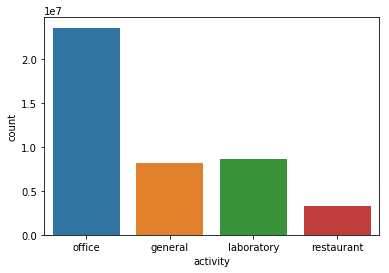

In [13]:
sns.countplot(x="activity", data=train);

In [14]:
train.groupby("units").count()

,meter_id,timestamp,values,date,site_id,meter_description,surface,activity,holiday,temperature,distance
units,,,,,,,,,,,
Wh,1398200,1398200,1396297,1398200,1398200,1398200,1398200,1398200,1398200,1246938,1246938
count,509282,509282,84480,509282,509282,509282,0,509282,509282,0,0
degree celsius,10694922,10694922,1528048,10694922,10694922,10694922,0,10694922,10694922,0,0
kWh,28774433,28774433,21977944,28774433,28774433,28774433,0,28774433,28774433,0,0


All observations in Wh have 'values' and 'surface' measurements. These are the only observations with 'temperature' and 'distance' measurements.

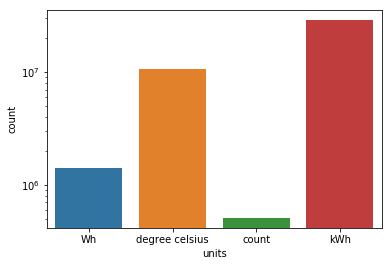

In [15]:
p = sns.countplot(x="units", data=train)
p.set(yscale="log");

In [16]:
train.groupby("holiday").count()

,meter_id,timestamp,values,date,site_id,meter_description,units,surface,activity,temperature,distance
holiday,,,,,,,,,,,
0.0,42405054,42405054,26433494,42405054,42405054,42405054,40181541,1393592,42405054,1246574,1246574
1.0,1263552,1263552,767491,1263552,1263552,1263552,1195296,4608,1263552,364,364


Holidays represent less than 3% of the total sample

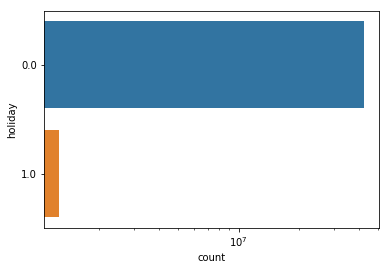

In [17]:
p = sns.countplot(y="holiday", data=train)
p.set(xscale="log");

In [18]:
train.groupby(["site_id", "meter_description"]).count()

meter_id  timestamp    values      date  \
site_id meter_description                                                      
038     RTE meter                      509282     509282    486644    509282   
        RTE meter: cos phi             509282     509282    479018    509282   
        RTE meter: demand              509282     509282    485742    509282   
        RTE meter: reactive            509282     509282    485743    509282   
        cold group                     509282     509282    493543    509282   
        compressed air                 509282     509282    494541    509282   
        cuisine                        509282     509282    487769    509282   
        guardhouse                     254641     254641    248984    254641   
        heating                       2546410    2546410    278960   2546410   
        laboratory                     509282     509282    473191    509282   
        lighting                      2546410    2546410   2475552   2546410   
        main meter                     254641     254641    254571    254641   
        main meter : demand            254641     254641    254571    254641   
        main meter: cos phi            254641     254641    254571    254641   
        main meter: reactive energy    254641     254641    254571    254641   
        other                        20880562   20880562  16345689  20880562   
        outside temperature            509282     509282     73564    509282   
        temperature                   9930999    9930999   1392984   9930999   
        total workers                  509282     509282     84480    509282   
234_203 Lighting                        35856      35856     35822     35856   
        Test Bay                        73152      73152     73144     73152   
        elevators                       73152      73152     73144     73152   
        generator                       73152      73152     73144     73152   
        heating                         36432      36432     36246     36432   
        lighting                        73056      73056     72950     73056   
        main meter                     117792     117792    117557    117792   
        other                          692208     692208    691372    692208   
        virtual main                    73200      73200     72970     73200   
334_61  main meter                      74976      74976     74830     74976   
        virtual meter                   75224      75224     75118     75224   

                                        units  surface  activity   holiday  \
site_id meter_description                                                    
038     RTE meter                      509282        0    509282    509282   
        RTE meter: cos phi                  0        0    509282    509282   
        RTE meter: demand                   0        0    509282    509282   
        RTE meter: reactive                 0        0    509282    509282   
        cold group                     509282        0    509282    509282   
        compressed air                 509282        0    509282    509282   
        cuisine                        509282        0    509282    509282   
        guardhouse                     254641        0    254641    254641   
        heating                       2546410        0   2546410   2546410   
        laboratory                     509282        0    509282    509282   
        lighting                      2546410        0   2546410   2546410   
        main meter                     254641        0    254641    254641   
        main meter : demand                 0        0    254641    254641   
        main meter: cos phi                 0        0    254641    254641   
        main meter: reactive energy         0        0    254641    254641   
        other                        20880562        0  20880562  20880562   
        outside temperature            509282        0    509282    5092

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


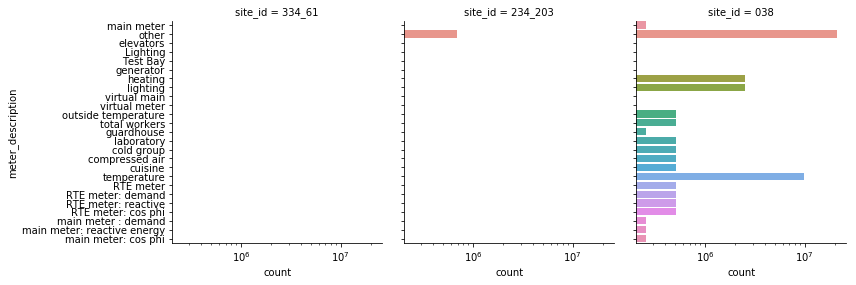

In [19]:
p = sns.factorplot(y="meter_description", 
               col="site_id",
               data=train,
               kind="count")
p.set(xscale="log");

In [20]:
train.groupby(["site_id", "units"]).count()

meter_id  timestamp    values      date  \
site_id units                                                     
038     count             509282     509282     84480    509282   
        degree celsius  10694922   10694922   1528048  10694922   
        kWh             28774433   28774433  21977944  28774433   
234_203 Wh               1248000    1248000   1246349   1248000   
334_61  Wh                150200     150200    149948    150200   

                        meter_description  surface  activity   holiday  \
site_id units                                                            
038     count                      509282        0    509282    509282   
        degree celsius           10694922        0  10694922  10694922   
        kWh                      28774433        0  28774433  28774433   
234_203 Wh                        1248000  1248000   1248000   1248000   
334_61  Wh                         150200   150200    150200    150200   

                        temperature  distance  
site_id units                                  
038     count                     0         0  
        degree celsius            0         0  
        kWh                       0         0  
234_203 Wh                  1234456   1234456  
334_61  Wh                    12482     12482

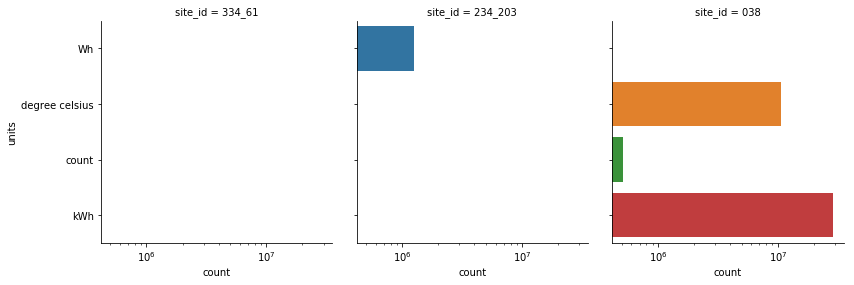

In [21]:
p = sns.factorplot(y="units", 
               col="site_id",
               data=train,
               kind="count")
p.set(xscale="log");

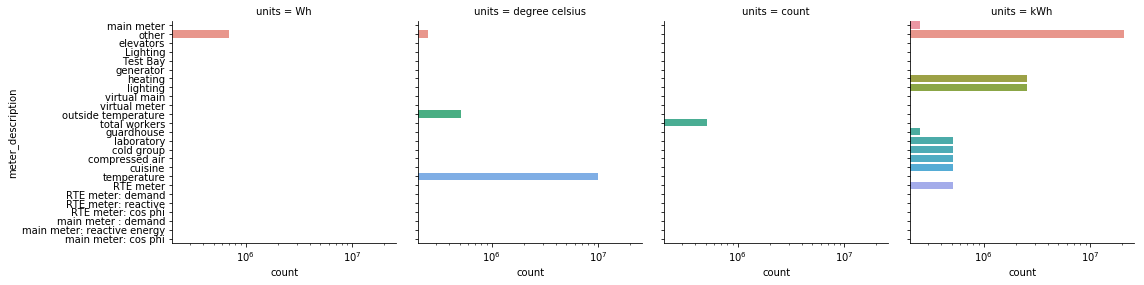

In [22]:
p = sns.factorplot(y="meter_description", 
               col="units", 
               data=train.loc[(train.units != -1)], 
               kind="count")
p.set(xscale="log");

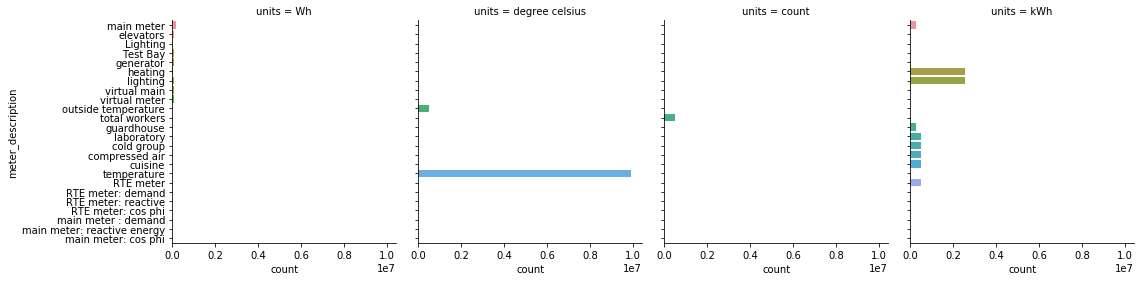

In [23]:
sns.factorplot(y="meter_description", 
               col="units", 
               data=train.loc[(train.units != -1) & (train.meter_description != 'other')], 
               kind="count");

In [24]:
train.meter_id.unique()

array(['2', '863', '869', '872', '875', '878', '881', '884', '887', '890',
       '896', '902', '911', '920', '925', '928', '930', '935', '938',
       '234_203', '334_61', '38_0', '38_1', '38_10106', '38_10107',
       '38_10108', '38_10109', '38_10110', '38_10111', '38_10112',
       '38_10113', '38_10114', '38_10115', '38_10116', '38_10117',
       '38_10118', '38_10119', '38_10120', '38_10121', '38_10122',
       '38_10123', '38_10124', '38_10125', '38_10126', '38_2', '38_52306',
       '38_52322', '38_52323', '38_52324', '38_52325', '38_52326',
       '38_52327', '38_52328', '38_52329', '38_52332', '38_52333',
       '38_52375', '38_52379', '38_52467', '38_52468', '38_52469',
       '38_52470', '38_52471', '38_52472', '38_52473', '38_52474',
       '38_52475', '38_52476', '38_52477', '38_52478', '38_52479',
       '38_52480', '38_52481', '38_52482', '38_56030', '38_56031',
       '38_56032', '38_56033', '38_56034', '38_56727', '38_56728',
       '38_56729', '38_56730', '38_56731',

In [25]:
# import matplotlib.pyplot as plt

# for i, meter in enumerate(train.meter_id.unique()):
#     plt.figure(i)
#     train.loc[train.meter_id == meter].plot()
#     if i > 5: break